In [1]:
import pandas as pd
import glob
import os
import datetime as dt
import numpy as np
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Folder path
folder = "data/customdata_new/"

# All files (.data or .csv)
files = sorted(glob.glob(folder + "*.csv"))

all_dfs = []

for f in files:

    # ---- Extract date from filename ----
    fname = os.path.basename(f)                  # e.g., "20250217.data" or "20250217.data.csv"
    date_str = fname.split('.')[0]               # "20250217"
    file_date = dt.datetime.strptime(date_str, "%Y%m%d").date()

    # ---- Load file ----
    df = pd.read_csv(f)

    # ---- Overwrite date column ----
    df["date"] = file_date

    # ---- Append to list ----
    all_dfs.append(df)

# ---- Combine all ----
combined_df = pd.concat(all_dfs, ignore_index=True)
# Replace +inf and -inf with NaN
combined_df['mid'] = combined_df['mid'].replace([np.inf, -np.inf], np.nan)

# Drop all rows where mid is NaN
combined_df = combined_df.dropna(subset=['mid'])
combined_df


,date,time,exchange,name,ltp,bid,ask,mid,spread,last_trade_qty,total_trade_amount,total_trade_qty,lot_size
0,2025-02-17,09:15:00.000000000,NSECM,360ONE,882.10,882.10,893.15,887.625,11.05,6.0,5.760113e+05,653.0,1.0
1,2025-02-17,09:15:00.000000000,NSECM,GAIL,160.31,160.31,160.99,160.650,0.68,500.0,6.508746e+06,40601.0,1.0
2,2025-02-17,09:15:00.000000000,NSEFO,GAIL25FEBFUT,162.23,160.57,162.47,161.520,1.90,2350.0,3.812405e+05,2350.0,2350.0
3,2025-02-17,09:15:00.000000000,NSEFO,GAIL25MARFUT,163.00,158.78,163.10,160.940,4.32,2350.0,3.830500e+05,2350.0,2350.0
4,2025-02-17,09:15:00.000000000,NSECM,GLENMARK,1320.00,1319.00,1320.00,1319.500,1.00,41.0,3.776520e+06,2861.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477946,2025-09-30,15:29:00.000000000,NSEFO,SUZLON25OCTFUT,55.19,55.16,55.19,55.175,0.03,8000.0,3.165875e+09,57384000.0,8000.0
4477947,2025-09-30,15:29:00.000000000,NSEFO,SUZLON25SEPFUT,54.82,54.82,54.84,54.830,0.02,8000.0,2.187458e+09,39888000.0,8000.0
4477948,2025-09-30,15:29:00.000000000,NSECM,SYNGENE,622.05,622.25,623.35,622.800,1.10,21.0,4.857407e+08,782292.0,1.0
4477949,2025-09-30,15:29:00.000000000,NSEFO,SYNGENE25OCTFUT,627.15,627.00,627.50,627.250,0.50,1000.0,1.252085e+09,2006000.0,1000.0


In [3]:
# combined_df['date'] = pd.to_datetime(combined_df['date']).dt.date
combined_df[ combined_df['date'] == dt.date(2025, 2, 17) ]


,date,time,exchange,name,ltp,bid,ask,mid,spread,last_trade_qty,total_trade_amount,total_trade_qty,lot_size
0,2025-02-17,09:15:00.000000000,NSECM,360ONE,882.10,882.10,893.15,887.625,11.05,6.0,5.760113e+05,653.0,1.0
1,2025-02-17,09:15:00.000000000,NSECM,GAIL,160.31,160.31,160.99,160.650,0.68,500.0,6.508746e+06,40601.0,1.0
2,2025-02-17,09:15:00.000000000,NSEFO,GAIL25FEBFUT,162.23,160.57,162.47,161.520,1.90,2350.0,3.812405e+05,2350.0,2350.0
3,2025-02-17,09:15:00.000000000,NSEFO,GAIL25MARFUT,163.00,158.78,163.10,160.940,4.32,2350.0,3.830500e+05,2350.0,2350.0
4,2025-02-17,09:15:00.000000000,NSECM,GLENMARK,1320.00,1319.00,1320.00,1319.500,1.00,41.0,3.776520e+06,2861.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31120,2025-02-17,15:29:00.000000000,NSEFO,SUPREMEIND25MARFUT,3655.75,3651.15,3657.30,3654.225,6.15,125.0,1.343570e+08,37250.0,125.0
31121,2025-02-17,15:29:00.000000000,NSECM,SUZLON,51.44,51.43,51.44,51.435,0.01,54.0,2.342514e+09,46358876.0,1.0
31122,2025-02-17,15:29:00.000000000,NSECM,SYNGENE,700.30,700.25,700.30,700.275,0.05,1.0,2.348229e+08,338752.0,1.0
31123,2025-02-17,15:29:00.000000000,NSEFO,SYNGENE25FEBFUT,702.95,702.55,703.30,702.925,0.75,1000.0,4.719322e+08,679000.0,1000.0


In [4]:
def last_thursday(year, month):
    d = dt.date(year, month, 1)
    next_month = d.replace(day=28) + dt.timedelta(days=4)
    last_day = next_month - dt.timedelta(days=next_month.day)
    while last_day.weekday() != 3:  # Thursday = 3
        last_day -= dt.timedelta(days=1)
    return last_day

def get_base(name):
    # strip "25FEBFUT", "25MARFUT", etc.
    return re.sub(r"\d{2}[A-Z]{3}FUT$", "", name)

def get_month(name):
    m = re.search(r"([A-Z]{3})FUT$", name)
    return m.group(1) if m else None

In [5]:
# Ensure date is datetime.date
combined_df['date'] = pd.to_datetime(combined_df['date']).dt.date

# Base (underlying name)
combined_df['base'] = combined_df['name'].apply(get_base)

# Compute days-to-expiry for each date in dataset
unique_dates = sorted(combined_df['date'].unique())
date_to_dte = {}

for d in unique_dates:
    # expiry of current month
    expiry_curr = last_thursday(d.year, d.month)
    
    if d <= expiry_curr:
        # near-month not expired yet
        date_to_dte[d] = (expiry_curr - d).days
    else:
        # near-month expired → use next month's expiry
        next_month = d.month + 1
        next_year = d.year
        
        if next_month == 13:
            next_month = 1
            next_year += 1
        
        expiry_next = last_thursday(next_year, next_month)
        date_to_dte[d] = (expiry_next - d).days


# Map it to the dataframe
combined_df['days_to_expiry'] = combined_df['date'].map(date_to_dte)

#if traded after last thursday count expiry as thursday of next month


In [6]:
combined_df.tail(20)

,date,time,exchange,name,ltp,bid,ask,mid,spread,last_trade_qty,total_trade_amount,total_trade_qty,lot_size,base,days_to_expiry
4477931,2025-09-30,15:29:00.000000000,NSEFO,SOLARINDS25OCTFUT,13453.00,13441.00,13453.00,13447.000,12.00,75.0,5.511062e+09,407550.0,75.0,SOLARINDS,30
4477932,2025-09-30,15:29:00.000000000,NSEFO,SOLARINDS25SEPFUT,13346.00,13335.00,13346.00,13340.500,11.00,75.0,3.628566e+09,269550.0,75.0,SOLARINDS,30
4477933,2025-09-30,15:29:00.000000000,NSECM,SONACOMS,411.80,411.35,411.75,411.550,0.40,173.0,9.933365e+08,2427212.0,1.0,SONACOMS,30
4477934,2025-09-30,15:29:00.000000000,NSEFO,SONACOMS25OCTFUT,414.35,413.70,414.45,414.075,0.75,1050.0,1.916980e+09,4667250.0,1050.0,SONACOMS,30
4477935,2025-09-30,15:29:00.000000000,NSEFO,SONACOMS25SEPFUT,412.05,411.95,412.05,412.000,0.10,1050.0,1.655558e+09,4056150.0,1050.0,SONACOMS,30
4477936,2025-09-30,15:29:00.000000000,NSECM,SRF,2809.00,2807.10,2814.00,2810.550,6.90,34.0,5.908213e+08,209799.0,1.0,SRF,30
4477937,2025-09-30,15:29:00.000000000,NSEFO,SRF25OCTFUT,2829.00,2827.20,2830.10,2828.650,2.90,200.0,2.694769e+09,953600.0,200.0,SRF,30
4477938,2025-09-30,15:29:00.000000000,NSEFO,SRF25SEPFUT,2813.70,2809.40,2813.80,2811.600,4.40,200.0,2.285183e+09,813600.0,200.0,SRF,30
4477939,2025-09-30,15:29:00.000000000,NSECM,SUNPHARMA,1594.40,1594.40,1595.60,1595.000,1.20,3.0,3.588299e+09,2248688.0,1.0,SUNPHARMA,30
4477940,2025-09-30,15:29:00.000000000,NSEFO,SUNPHARMA25OCTFUT,1605.00,1605.00,1605.30,1605.150,0.30,350.0,3.829422e+09,2382800.0,350.0,SUNPHARMA,30


In [7]:
# all bases present
all_bases = sorted(combined_df['base'].unique())

# we’ll keep only those with both CM & at least one FUT
valid_bases = []
for b in all_bases:
    sub = combined_df[combined_df['base'] == b]
    has_cm   = (sub['name'] == b).any()
    has_fut  = sub['name'].str.contains('FUT').any()
    if has_cm and has_fut:
        valid_bases.append(b)

len(valid_bases), valid_bases[:10]


(29,
 ['360ONE',
  'GAIL',
  'GLENMARK',
  'GMRAIRPORT',
  'GODREJCP',
  'GODREJPROP',
  'GRASIM',
  'LAURUSLABS',
  'LICHSGFIN',
  'LICI'])

In [8]:
stock_list = valid_bases   # or overwrite with your handpicked 29


In [9]:
stock_to_df = {}   # this will hold your 29 dataframes

for stock in stock_list:
    sub = combined_df[combined_df['base'] == stock].copy()

    # we’ll store daily spreads first
    daily_records = []

    for d in sorted(sub['date'].unique()):
        day_sub = sub[sub['date'] == d]

        # CM rows
        cm = day_sub[day_sub['name'] == stock]

        # FUT1 = near-month future: month = month of d
        fut1_month = d.strftime('%b').upper()
        fut1_names = day_sub[
            (day_sub['name'] != stock) &
            (day_sub['name'].apply(get_month) == fut1_month)
        ]['name'].unique()

        if len(fut1_names) != 1:
            # no clear single FUT1 for this stock on this date
            continue

        fut1 = day_sub[day_sub['name'] == fut1_names[0]]

        # require enough data & matching timestamps
        if len(cm) == 0 or len(fut1) == 0:
            continue

        # align by time just to be safe
        cm_sorted   = cm.sort_values('time')
        fut1_sorted = fut1.sort_values('time')

        # inner join on time to ensure same timestamps
        merged = pd.merge(
            cm_sorted[['time', 'mid']],
            fut1_sorted[['time', 'mid']],
            on='time',
            suffixes=('_cm', '_fut1')
        )

        if len(merged) == 0:
            continue

        # minute-wise spread: CM-FUT1
        merged['cm_fut1'] = merged['mid_cm'] - merged['mid_fut1']
        daily_mean = merged['cm_fut1'].mean()

        daily_records.append({
            'date': d,
            'days_to_expiry': date_to_dte[d],
            'cm_fut1': daily_mean
        })

    if not daily_records:
        continue

    daily_df = pd.DataFrame(daily_records)

    # now average over same days_to_expiry for this stock
    by_dte = (
        daily_df
        .groupby('days_to_expiry', as_index=False)['cm_fut1']
        .mean()
        .rename(columns={'cm_fut1': 'mean_cm_fut1'})
        .sort_values('days_to_expiry')
    )

    stock_to_df[stock] = by_dte


In [10]:
stock_to_df

{'360ONE':     days_to_expiry  mean_cm_fut1
 0                0     -0.692781
 1                1     -0.067380
 2                2     -1.147333
 3                3     -2.650936
 4                6     -3.098886
 5                7     -3.543862
 6                8     -1.362358
 7                9     -1.250467
 8               10     -3.118375
 9               13     -2.509933
 10              14     -3.881067
 11              15     -4.190942
 12              16     -3.536408
 13              17     -3.968093
 14              20     -4.040978
 15              21     -4.188894
 16              22     -5.805000
 17              23     -4.258267
 18              24     -3.361814
 19              27     -2.733733
 20              28     -8.301080
 21              29     -6.944133
 22              30     -4.283427
 23              31     -0.720722,
 'GAIL':     days_to_expiry  mean_cm_fut1
 0                0      0.040277
 1                1      0.032321
 2                2      0.03

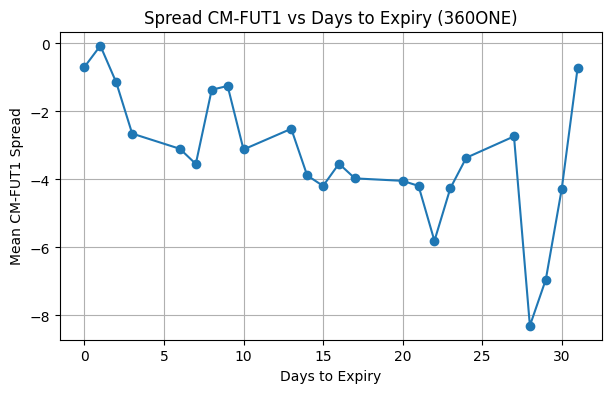

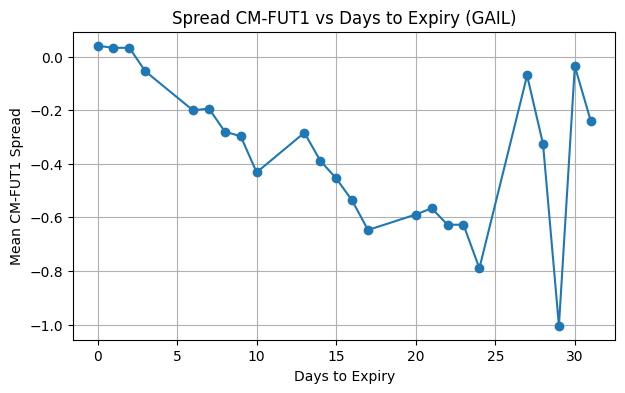

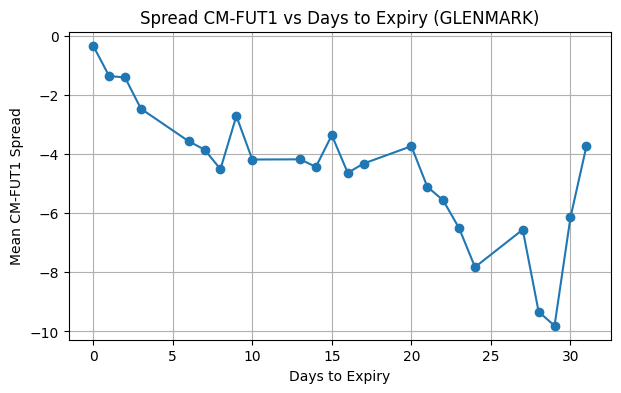

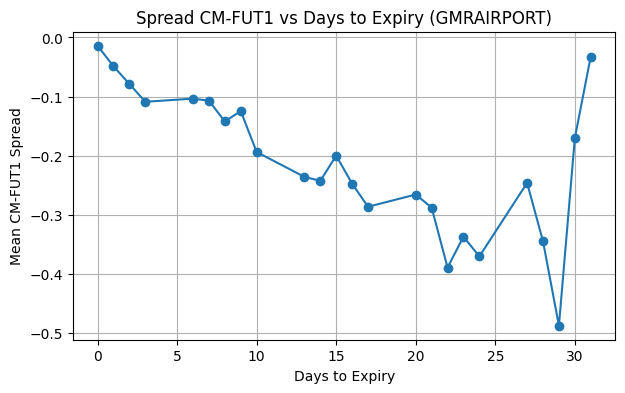

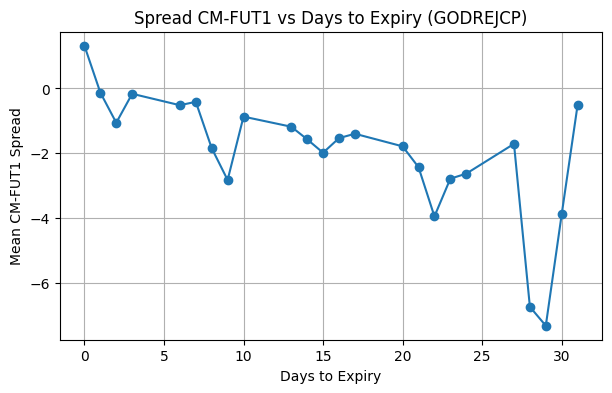

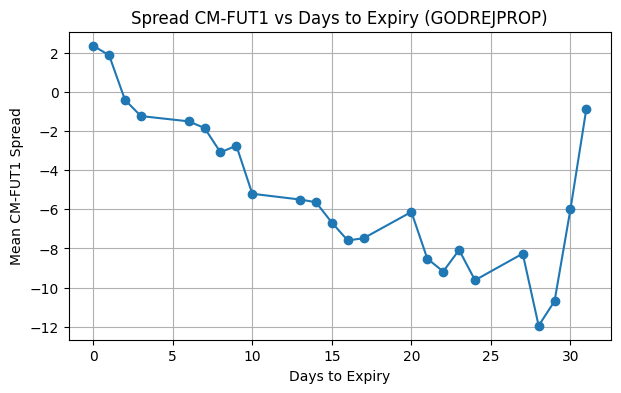

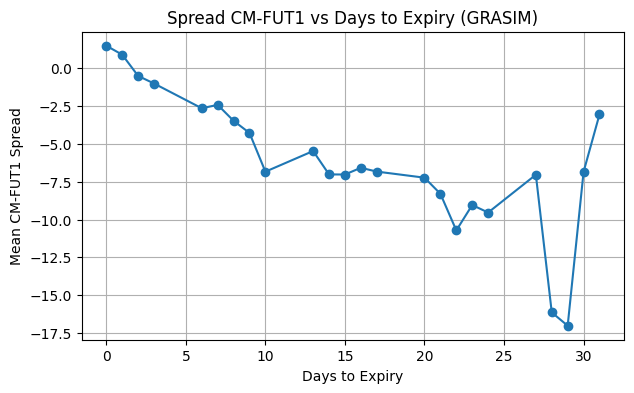

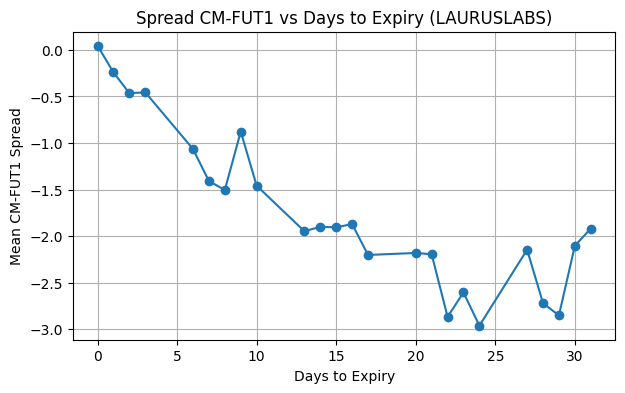

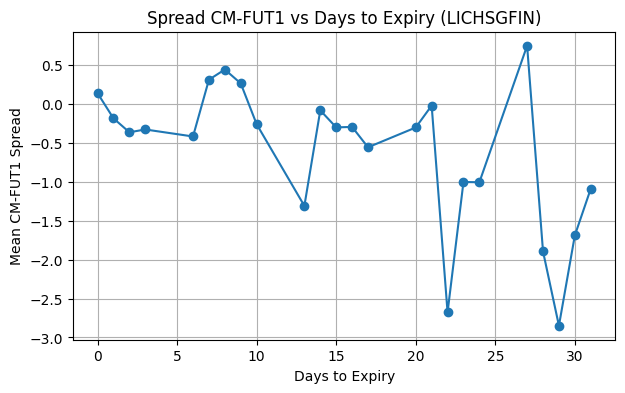

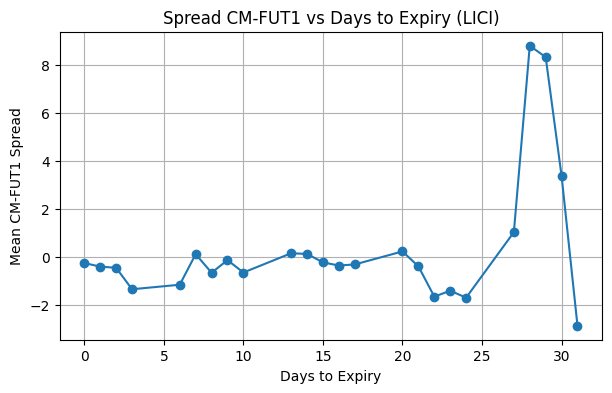

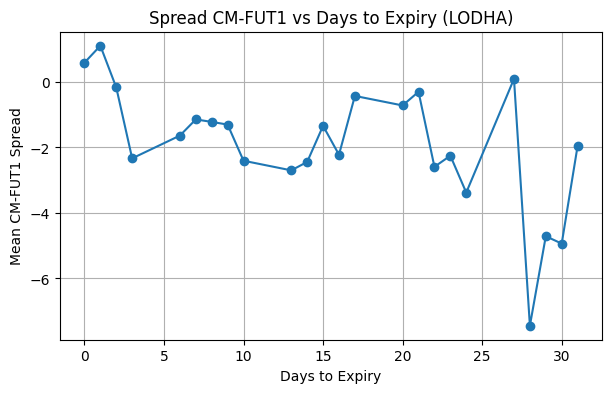

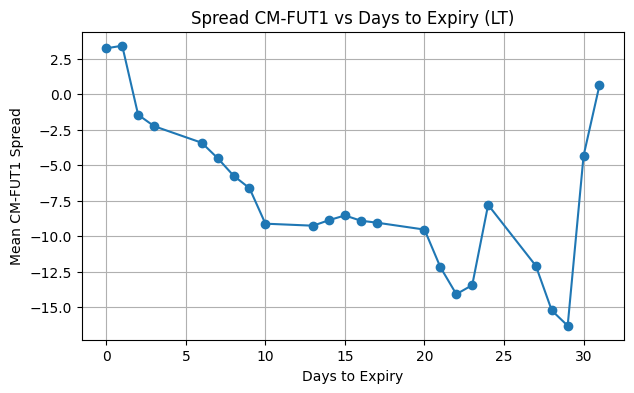

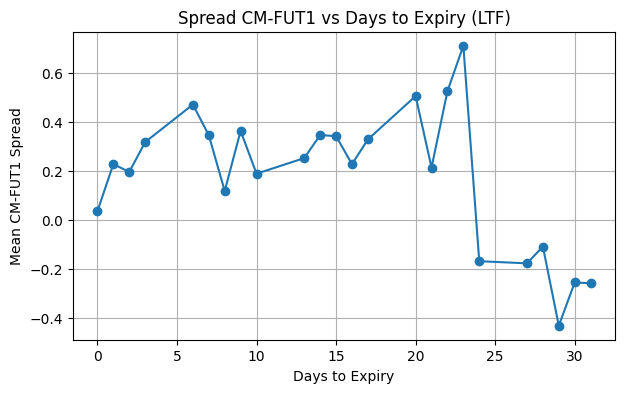

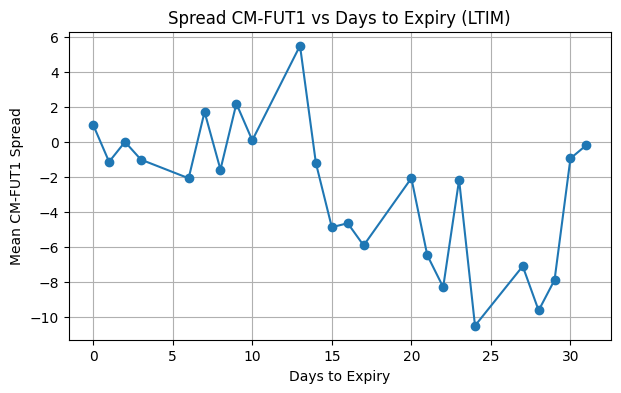

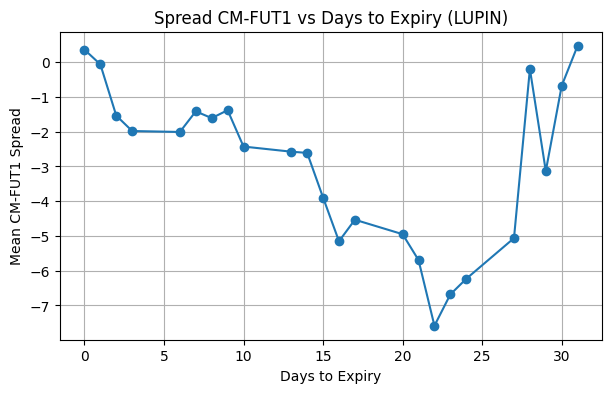

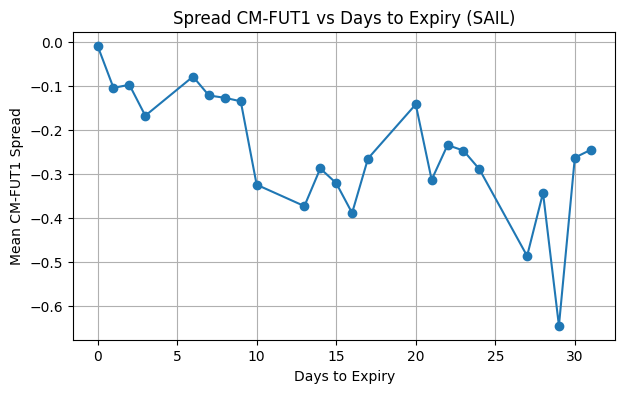

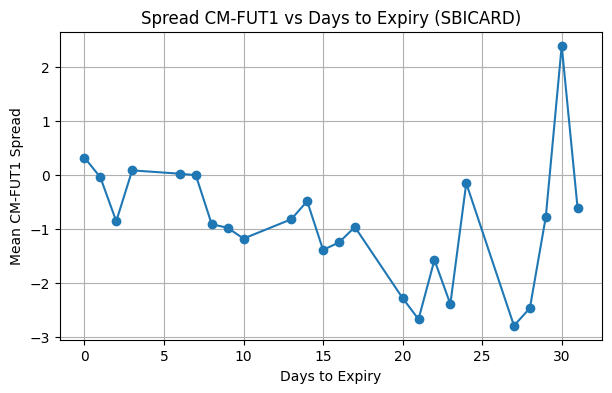

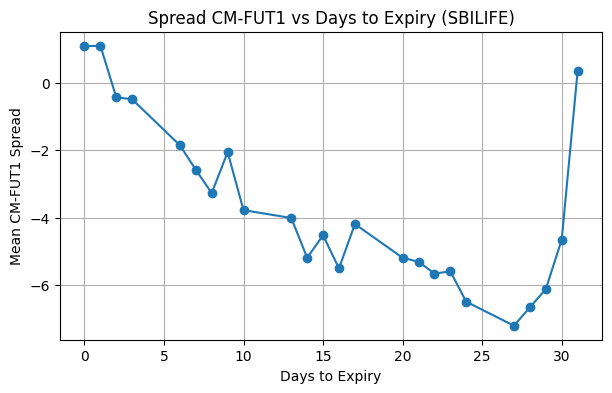

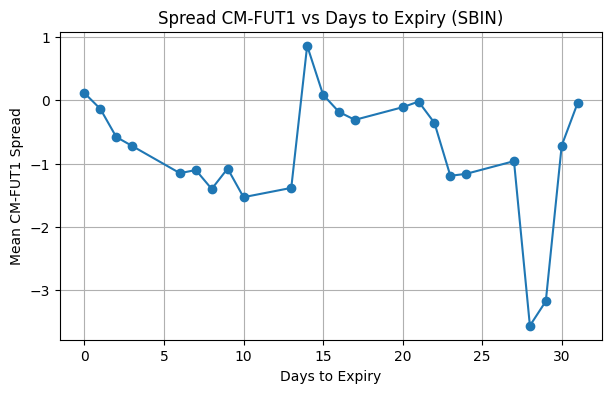

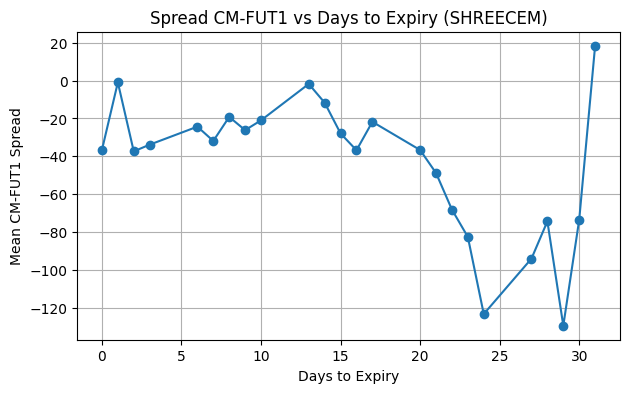

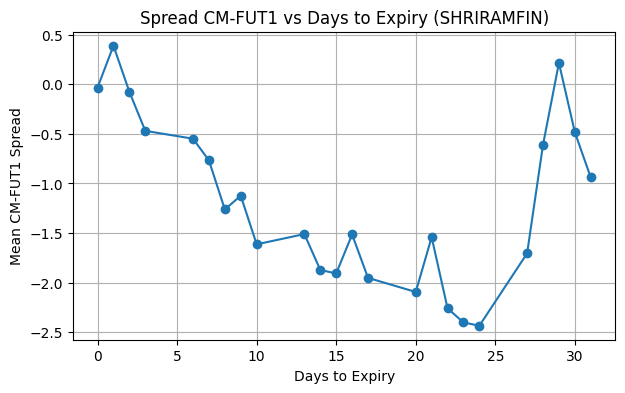

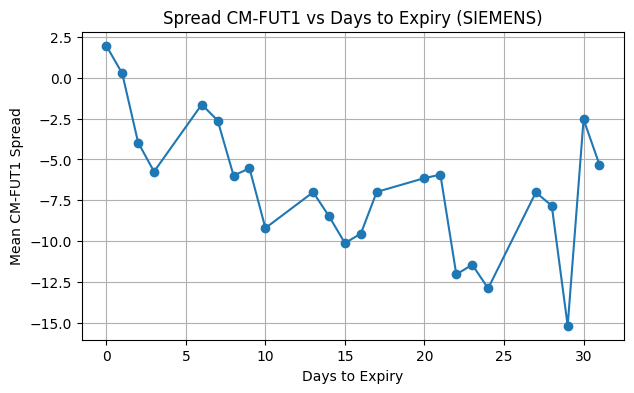

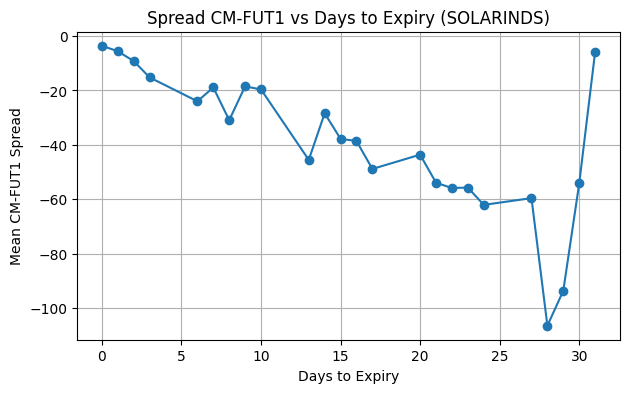

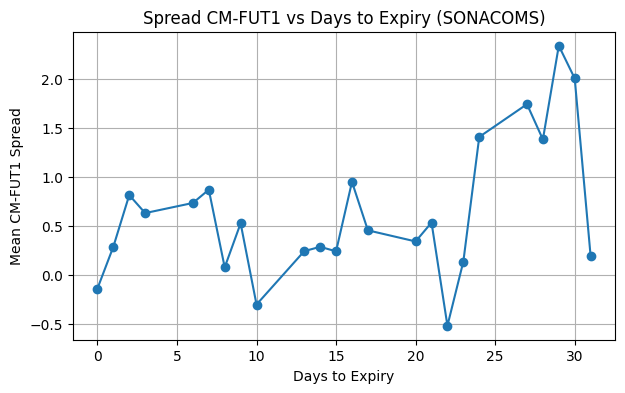

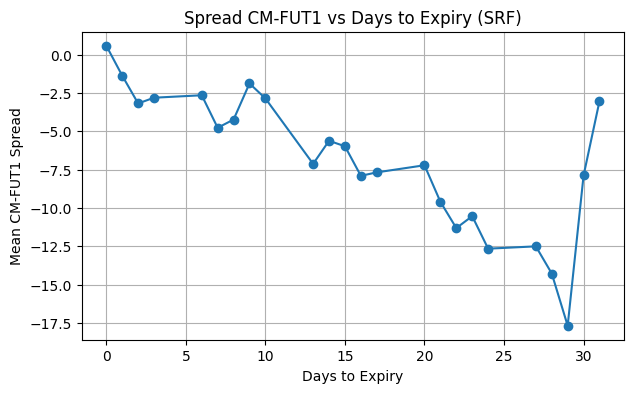

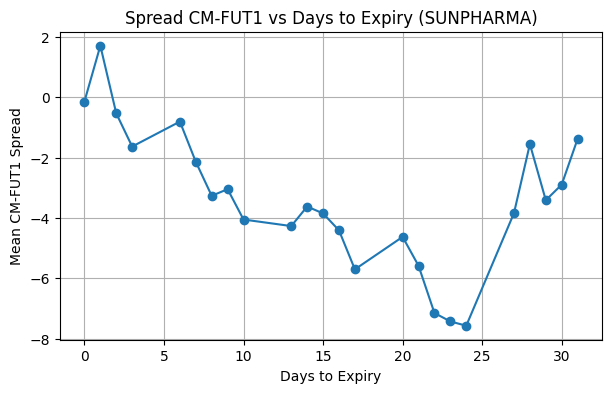

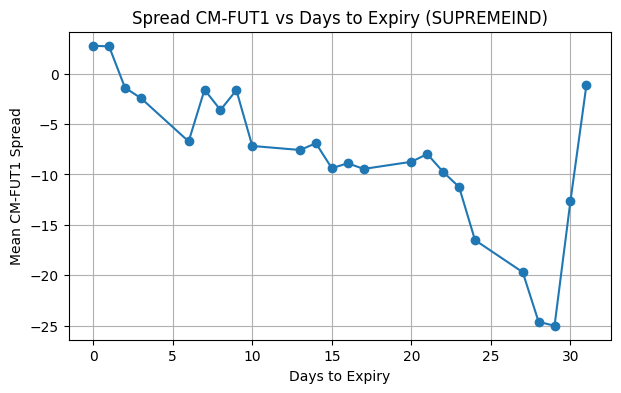

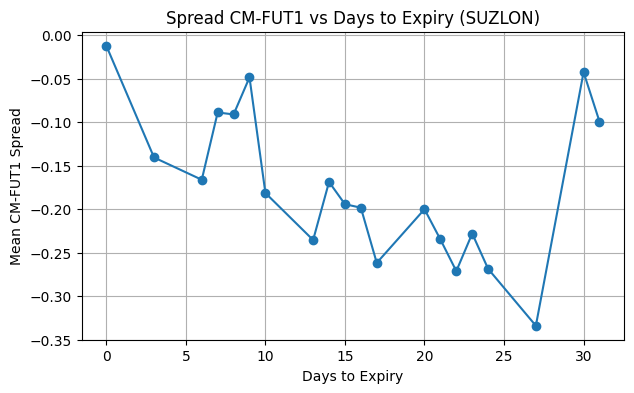

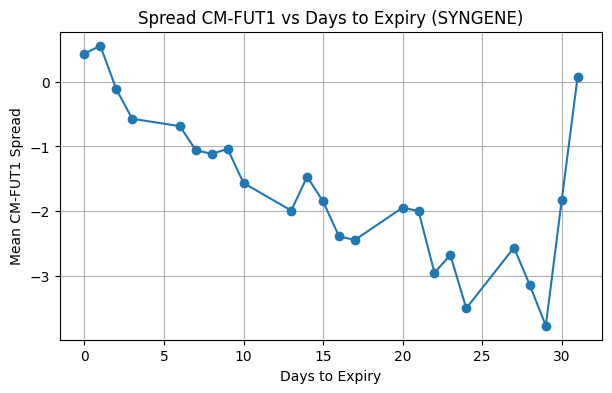

In [11]:

for stock, df in stock_to_df.items():

    plt.figure(figsize=(7,4))
    plt.plot(df['days_to_expiry'], df['mean_cm_fut1'], marker='o')
    
    plt.title(f"Spread CM-FUT1 vs Days to Expiry ({stock})")
    plt.xlabel("Days to Expiry")
    plt.ylabel("Mean CM-FUT1 Spread")
    plt.grid(True)

    plt.show()


In [12]:
custom_colors = [
    "red", "blue", "yellow", "green", "violet", "black",
    "orange", "cyan", "magenta", "brown", "darkgreen", "darkblue",
    "gold", "purple", "gray", "pink", "teal", "navy",
    "maroon", "olive", "lime", "indigo", "turquoise", "darkred",
    "darkviolet", "darkorange", "slateblue", "forestgreen", "darkcyan"
]

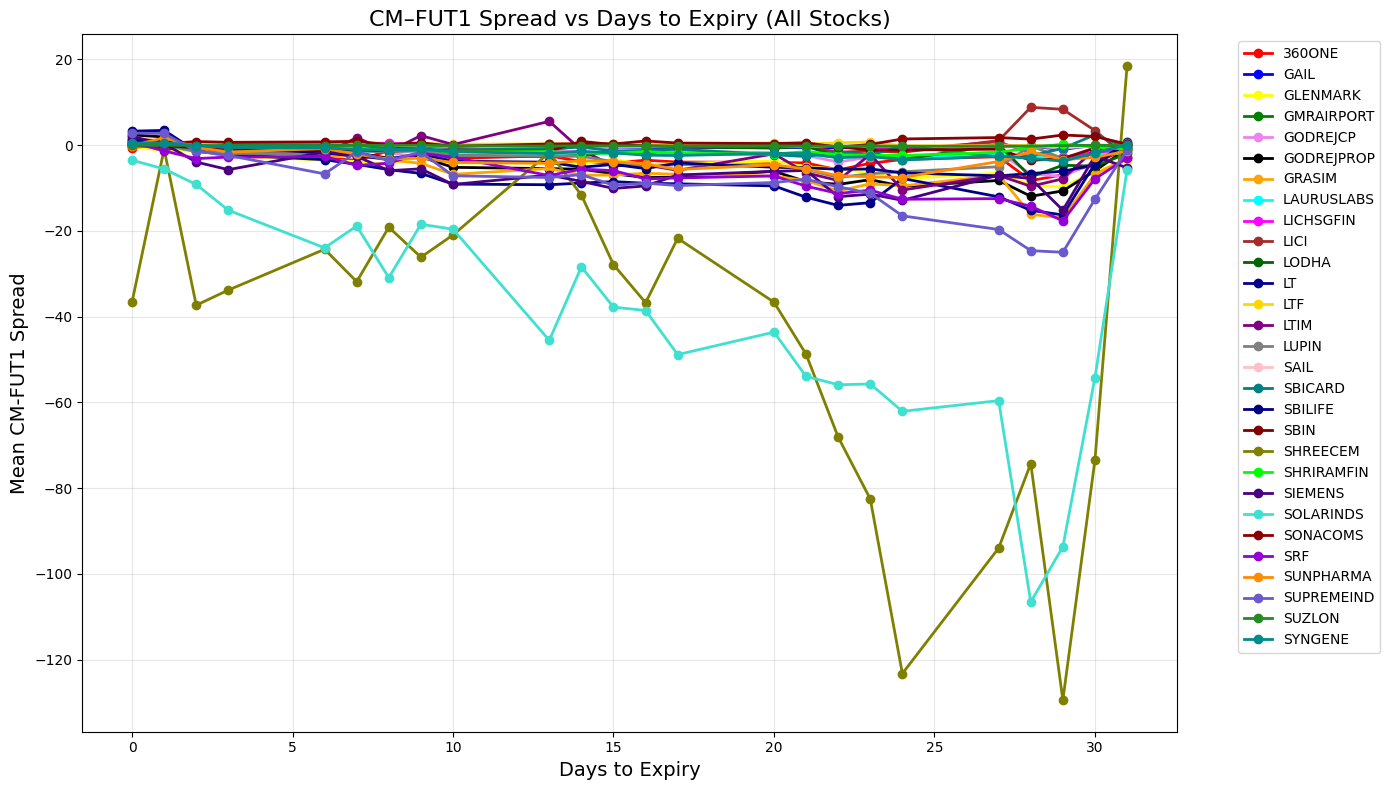

In [13]:
plt.figure(figsize=(14, 8))
stocks = list(stock_to_df.keys())
# Define the same custom palette you used earlier

for i, stock in enumerate(stocks):
    df_sorted = stock_to_df[stock].sort_values("days_to_expiry")
    plt.plot(
        df_sorted["days_to_expiry"],
        df_sorted["mean_cm_fut1"],
        marker='o',
        linewidth=2,
        markersize=6,
        label=stock,
        color=custom_colors[i % len(custom_colors)]  # cycle through palette
    )

plt.xlabel("Days to Expiry", fontsize=14)
plt.ylabel("Mean CM-FUT1 Spread", fontsize=14)
plt.title("CM–FUT1 Spread vs Days to Expiry (All Stocks)", fontsize=16)

plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


Diagnostic for the big spreads :

Identify stocks with abnormally large CM-FUT1 spreads

In [14]:
suspects = {}

for stock, df_stock in stock_to_df.items():
    max_spread = df_stock['mean_cm_fut1'].abs().max()
    suspects[stock] = max_spread

# Sort by largest spreads
sorted_suspects = sorted(suspects.items(), key=lambda x: x[1], reverse=True)
sorted_suspects[:2]


[('SHREECEM', np.float64(129.42666666666668)),
 ('SOLARINDS', np.float64(106.56801333333333))]

Check daily spreads to find which specific dates are bad

In [15]:
debug_spreads = {}   # {stock : DataFrame(daily details)}

for stock in stock_list:
    daily_details = []   # Each row: date, days_to_expiry, daily_spread

    sub = combined_df[combined_df['base'] == stock].copy()

    for d in sorted(sub['date'].unique()):
        day_sub = sub[sub['date'] == d]

        # same identification as before...

        # after computing merged daily_spread:
        daily_details.append({
            'date': d,
            'days_to_expiry': date_to_dte[d],
            'daily_spread': daily_mean,
            'num_points': len(merged)
        })

    if daily_details:
        debug_spreads[stock] = pd.DataFrame(daily_details)


sus dates:

In [16]:
d = debug_spreads['LAURUSLABS'].sort_values('daily_spread', ascending=False).iloc[0]['date']



Visualize the exact minute-wise spread on the bad day

<Axes: title={'center': 'LAURUSLABS Spread on 2025-02-17'}, xlabel='time'>

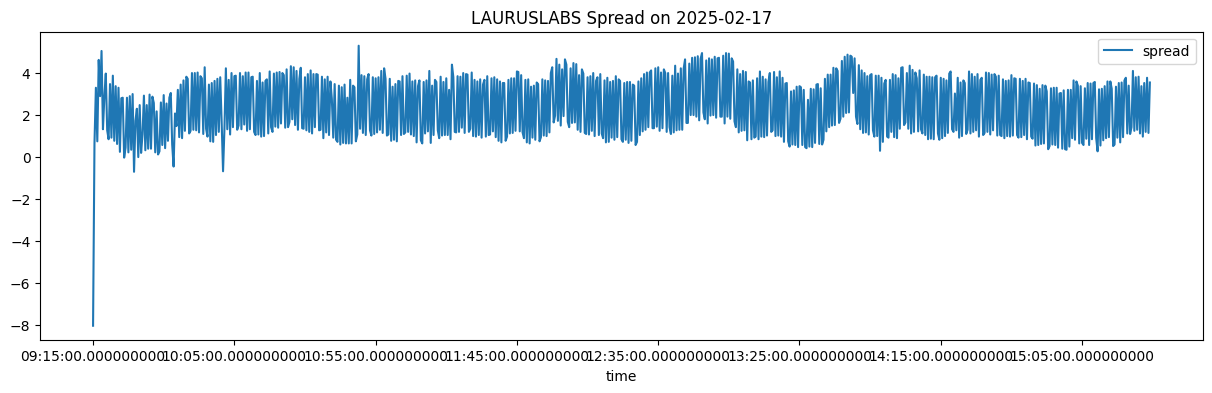

In [17]:
day = combined_df[(combined_df['base']=='LAURUSLABS') & (combined_df['date']==d)]

cm  = day[day['name']=='LAURUSLABS'].sort_values('time')
fut = day[day['name'].str.contains('FUT')].sort_values('time')

merged = cm.merge(fut, on='time', suffixes=('_cm','_fut1'))

merged['spread'] = merged['mid_fut1'] - merged['mid_cm']

merged[['time','spread']].plot(x='time', figsize=(15,4), title=f"LAURUSLABS Spread on {d}")


In [18]:

# --- choose a date d (or use the one you had)
d = list(combined_df[combined_df['base']=='LAURUSLABS']['date'].unique())[0]
print("Checking SHREECEM for date:", d)

# --- filter data for this stock & date
day = combined_df[(combined_df['base']=='LAURUSLABS') & (combined_df['date']==d)].copy()

cm  = day[day['name'] == 'LAURUSLABS'].copy()
fut = day[day['name'].str.contains('FUT')].copy()

print("CM rows:", len(cm))
print("FUT rows:", len(fut))

if len(cm)==0 or len(fut)==0:
    print("Either CM or FUT is missing — cannot compute spread.")
else:
    # --- convert time to string 'HH:MM:SS' for accurate comparison
    cm['time_norm']  = cm['time'].astype(str).str.slice(0,8)
    fut['time_norm'] = fut['time'].astype(str).str.slice(0,8)
    
    cm_times  = set(cm['time_norm'])
    fut_times = set(fut['time_norm'])
    
    common = cm_times & fut_times
    cm_only = cm_times - fut_times
    fut_only = fut_times - cm_times
    
    print("\n=== TIMESTAMP DIAGNOSTICS ===")
    print("Common timestamps:", len(common))
    print("CM-only timestamps:", len(cm_only))
    print("FUT-only timestamps:", len(fut_only))
    
    # Print a preview of mismatched times
    print("\nSome CM-only times:", list(cm_only)[:10])
    print("Some FUT-only times:", list(fut_only)[:10])


Checking SHREECEM for date: 2025-02-17
CM rows: 375
FUT rows: 749

=== TIMESTAMP DIAGNOSTICS ===
Common timestamps: 375
CM-only timestamps: 0
FUT-only timestamps: 0

Some CM-only times: []
Some FUT-only times: []


1.A.2

order the contract months

In [19]:
# Map month code to an order index
month_to_num = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

def contract_month_num(name: str) -> int:
    """Return an integer month order for a FUT instrument."""
    m = get_month(name)   # e.g. 'FEB' from 'SHREECEM25FEBFUT'
    return month_to_num.get(m, 99)   # large fallback if something weird


Do fut1_fut2 for ONE stock (sanity check)

In [20]:
test_stock = "SHREECEM"

sub = combined_df[combined_df['base'] == test_stock].copy()

daily_records_fut = []

for d in sorted(sub['date'].unique()):
    day_sub = sub[sub['date'] == d]

    # all futures for this stock on this day
    fut_rows = day_sub[(day_sub['name'] != test_stock) &
                       (day_sub['name'].str.contains('FUT'))]

    fut_names = fut_rows['name'].unique()

    # need at least 2 futures to define FUT1 & FUT2
    if len(fut_names) < 2:
        continue

    # sort contracts by month -> near is first, far is second
    fut_names_sorted = sorted(fut_names, key=contract_month_num)
    fut1_name, fut2_name = fut_names_sorted[0], fut_names_sorted[1]

    fut1 = day_sub[day_sub['name'] == fut1_name].sort_values('time')
    fut2 = day_sub[day_sub['name'] == fut2_name].sort_values('time')

    if len(fut1) == 0 or len(fut2) == 0:
        continue

    merged = pd.merge(
        fut1[['time', 'mid']],
        fut2[['time', 'mid']],
        on='time',
        suffixes=('_fut1', '_fut2')
    )

    if len(merged) == 0:
        continue

    # FUT1 - FUT2 spread minute-wise
    merged['fut1_fut2'] = merged['mid_fut1'] - merged['mid_fut2']
    daily_mean = merged['fut1_fut2'].mean()

    daily_records_fut.append({
        'date': d,
        'days_to_expiry': date_to_dte[d],
        'fut1_fut2': daily_mean
    })

test_daily_fut = pd.DataFrame(daily_records_fut)
test_daily_fut.head()


,date,days_to_expiry,fut1_fut2
0,2025-02-17,10,645.081933
1,2025-02-18,9,653.068000
2,2025-02-19,8,645.502000
3,2025-02-20,7,666.410467
4,2025-02-21,6,669.908400


Generalise to ALL stocks

In [21]:
stock_to_df_fut1fut2 = {}   # dict: stock -> DataFrame(days_to_expiry, mean_fut1_fut2)

for stock in stock_list:
    sub = combined_df[combined_df['base'] == stock].copy()
    daily_records = []

    for d in sorted(sub['date'].unique()):
        day_sub = sub[sub['date'] == d]

        # all futures for this stock on this day
        fut_rows = day_sub[(day_sub['name'] != stock) &
                           (day_sub['name'].str.contains('FUT'))]
        fut_names = fut_rows['name'].unique()

        # need at least 2 futures to define FUT1 & FUT2
        if len(fut_names) < 2:
            continue

        # order by contract month
        fut_names_sorted = sorted(fut_names, key=contract_month_num)
        fut1_name, fut2_name = fut_names_sorted[0], fut_names_sorted[1]

        fut1 = day_sub[day_sub['name'] == fut1_name].sort_values('time')
        fut2 = day_sub[day_sub['name'] == fut2_name].sort_values('time')

        if len(fut1) == 0 or len(fut2) == 0:
            continue

        merged = pd.merge(
            fut1[['time', 'mid']],
            fut2[['time', 'mid']],
            on='time',
            suffixes=('_fut1', '_fut2')
        )

        if len(merged) == 0:
            continue

        merged['fut1_fut2'] = merged['mid_fut1'] - merged['mid_fut2']
        daily_mean = merged['fut1_fut2'].mean()

        daily_records.append({
            'date': d,
            'days_to_expiry': date_to_dte[d],
            'fut1_fut2': daily_mean
        })

    if not daily_records:
        continue

    daily_df = pd.DataFrame(daily_records)

    # Average over same days_to_expiry for this stock
    by_dte = (
        daily_df
        .groupby('days_to_expiry', as_index=False)['fut1_fut2']
        .mean()
        .rename(columns={'fut1_fut2': 'mean_fut1_fut2'})
        .sort_values('days_to_expiry')
    )

    stock_to_df_fut1fut2[stock] = by_dte


Plot all stocks' FUT1 FUT2 spreads on one big chart

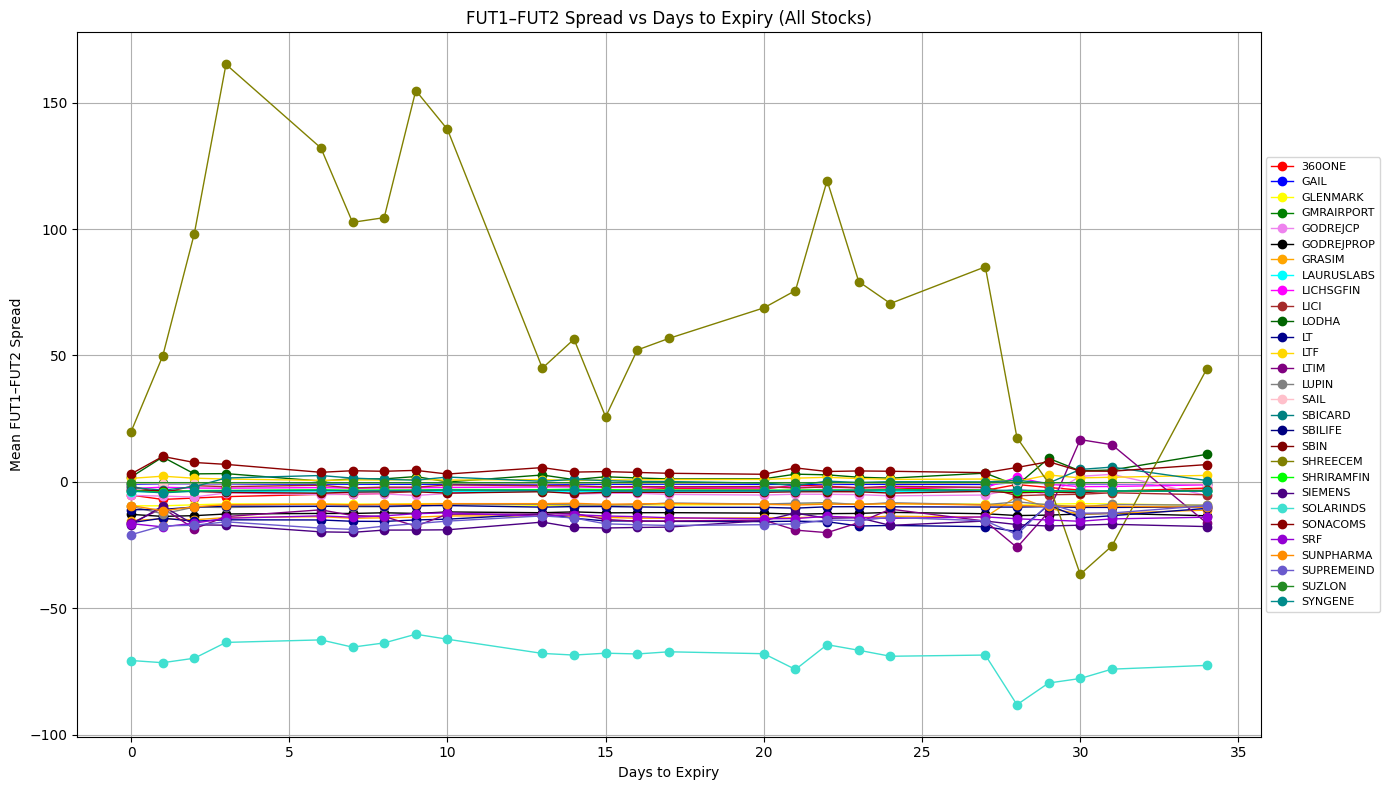

In [22]:
plt.figure(figsize=(14, 8))
stocks = list(stock_to_df_fut1fut2.keys())

for i, stock in enumerate(stocks):
    df_spread = stock_to_df_fut1fut2[stock]
    plt.plot(
        df_spread['days_to_expiry'],
        df_spread['mean_fut1_fut2'],
        marker='o',
        linewidth=1,
        label=stock,
        color=custom_colors[i % len(custom_colors)]  # cycle through custom palette
    )

plt.xlabel("Days to Expiry")
plt.ylabel("Mean FUT1–FUT2 Spread")
plt.title("FUT1–FUT2 Spread vs Days to Expiry (All Stocks)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


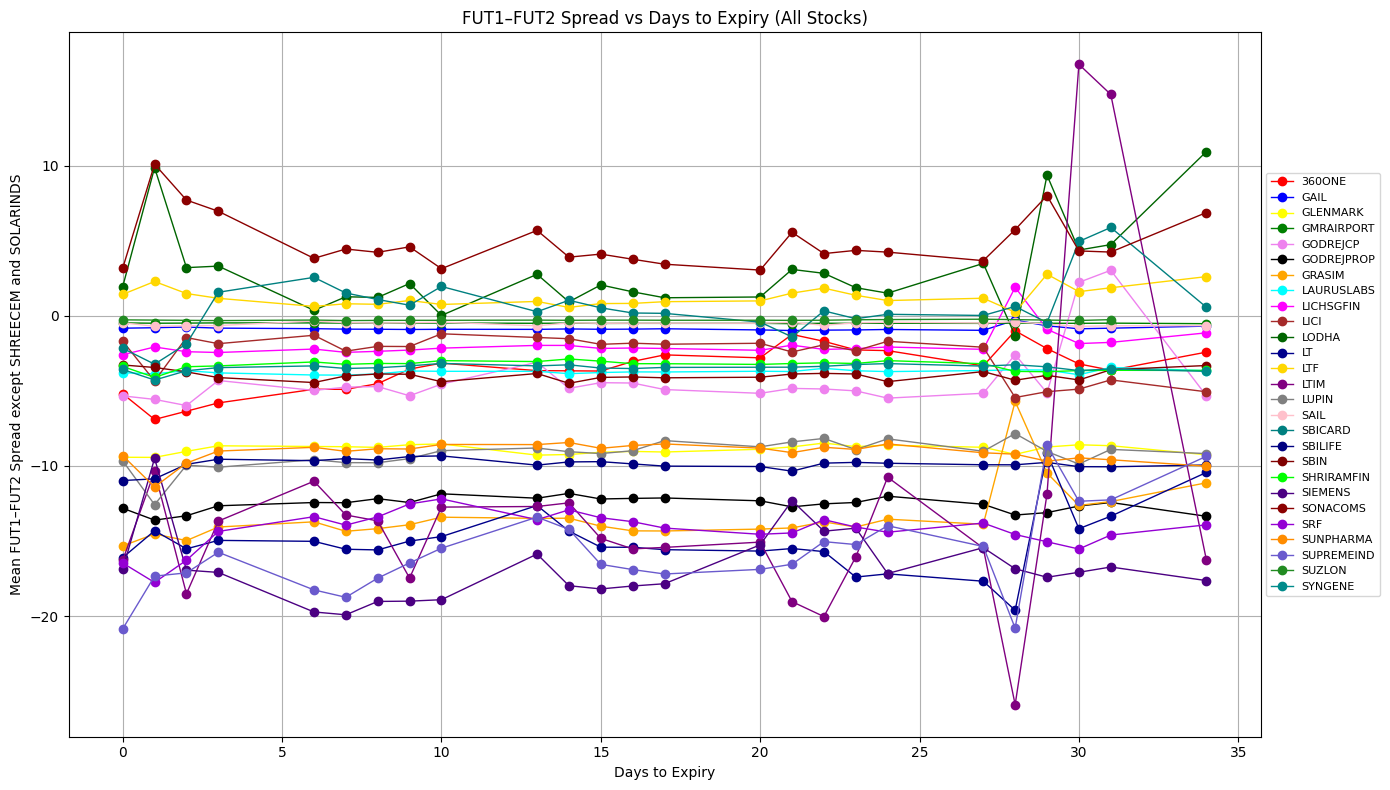

In [ ]:
plt.figure(figsize=(14, 8))
stocks = list(stock_to_df_fut1fut2.keys())

for i, stock in enumerate(stocks):
    if stock in ["SHREECEM", "SOLARINDS"]:
         continue  # skip these stocks
    df_spread = stock_to_df_fut1fut2[stock]
    plt.plot(
        df_spread['days_to_expiry'],
        df_spread['mean_fut1_fut2'],
        marker='o',
        linewidth=1,
        label=stock,
        color=custom_colors[i % len(custom_colors)]  # cycle through custom palette
    )

plt.xlabel("Days to Expiry")
plt.ylabel("Mean FUT1–FUT2 Spread except SHREECEM and SOLARINDS")
plt.title("FUT1–FUT2 Spread vs Days to Expiry (All Stocks)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
#

1.B.1 : 
Plot volume ratios between underlying and futures, against days to expiry (10 points) <br>
cm_fut1


In [23]:

# --------------------------------------------------
# Helper: next calendar month (year, month)
# --------------------------------------------------
def next_month(year, month):
    if month == 12:
        return year + 1, 1
    else:
        return year, month + 1

MONTH_ABBR = {
    1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN',
    7:'JUL', 8:'AUG', 9:'SEP',10:'OCT',11:'NOV',12:'DEC'
}

# --------------------------------------------------
# 1) Compute daily volume ratios for each stock
# --------------------------------------------------

vol_records_cm_fut1 = []   # one row per stock-date
vol_records_fut1_fut2 = [] # one row per stock-date

for stock in stock_list:
    sub = combined_df[combined_df['base'] == stock]

    for d in sorted(sub['date'].unique()):
        day_sub = sub[sub['date'] == d]

        # ---- Identify CM, FUT1, FUT2 for this stock & day ----
        cm = day_sub[day_sub['name'] == stock]

        # Near month (FUT1) = month of the calendar date
        fut1_month_abbr = MONTH_ABBR[d.month]
        fut1_names = day_sub[
            (day_sub['name'] != stock) &
            day_sub['name'].str.contains('FUT') &
            (day_sub['name'].apply(get_month) == fut1_month_abbr)
        ]['name'].unique()

        # Far month (FUT2) = next calendar month
        ny, nm = next_month(d.year, d.month)
        fut2_month_abbr = MONTH_ABBR[nm]
        fut2_names = day_sub[
            (day_sub['name'] != stock) &
            day_sub['name'].str.contains('FUT') &
            (day_sub['name'].apply(get_month) == fut2_month_abbr)
        ]['name'].unique()

        # Need clear one-to-one mapping
        if len(fut1_names) != 1:
            continue
        if len(fut2_names) != 1:
            continue

        fut1 = day_sub[day_sub['name'] == fut1_names[0]]
        fut2 = day_sub[day_sub['name'] == fut2_names[0]]

        # If any leg missing, skip
        if len(cm) == 0 or len(fut1) == 0 or len(fut2) == 0:
            continue

        # ---- Daily volumes (sum of minute last_trade_qty) ----
        cm_vol   = cm['last_trade_qty'].sum()
        fut1_vol = fut1['last_trade_qty'].sum()
        fut2_vol = fut2['last_trade_qty'].sum()

        # Avoid divide-by-zero
        if cm_vol <= 0 or fut1_vol <= 0 or fut2_vol <= 0:
            continue

        dte = date_to_dte[d]  # days_to_expiry for this date

        # cm_fut1 ratio = CM volume / FUT1 volume
        vol_records_cm_fut1.append({
            'stock': stock,
            'date': d,
            'days_to_expiry': dte,
            'cm_fut1_ratio': cm_vol / fut1_vol
        })

        # fut1_fut2 ratio = FUT1 volume / FUT2 volume
        vol_records_fut1_fut2.append({
            'stock': stock,
            'date': d,
            'days_to_expiry': dte,
            'fut1_fut2_ratio': fut1_vol / fut2_vol
        })

# Convert to DataFrames
vol_cm_fut1_df = pd.DataFrame(vol_records_cm_fut1)
vol_fut1_fut2_df = pd.DataFrame(vol_records_fut1_fut2)

# --------------------------------------------------
# 2) Aggregate by days_to_expiry for each stock
# --------------------------------------------------

stock_vol_cm_fut1 = {}
stock_vol_fut1_fut2 = {}

for stock in stock_list:
    tmp1 = vol_cm_fut1_df[vol_cm_fut1_df['stock'] == stock]
    if not tmp1.empty:
        stock_vol_cm_fut1[stock] = (
            tmp1.groupby('days_to_expiry', as_index=False)['cm_fut1_ratio']
                .mean()
                .rename(columns={'cm_fut1_ratio': 'mean_cm_fut1_ratio'})
                .sort_values('days_to_expiry')
        )

    tmp2 = vol_fut1_fut2_df[vol_fut1_fut2_df['stock'] == stock]
    if not tmp2.empty:
        stock_vol_fut1_fut2[stock] = (
            tmp2.groupby('days_to_expiry', as_index=False)['fut1_fut2_ratio']
                .mean()
                .rename(columns={'fut1_fut2_ratio': 'mean_fut1_fut2_ratio'})
                .sort_values('days_to_expiry')
        )




1.b.1. Plot: cm_fut1 volume ratio vs days_to_expiry


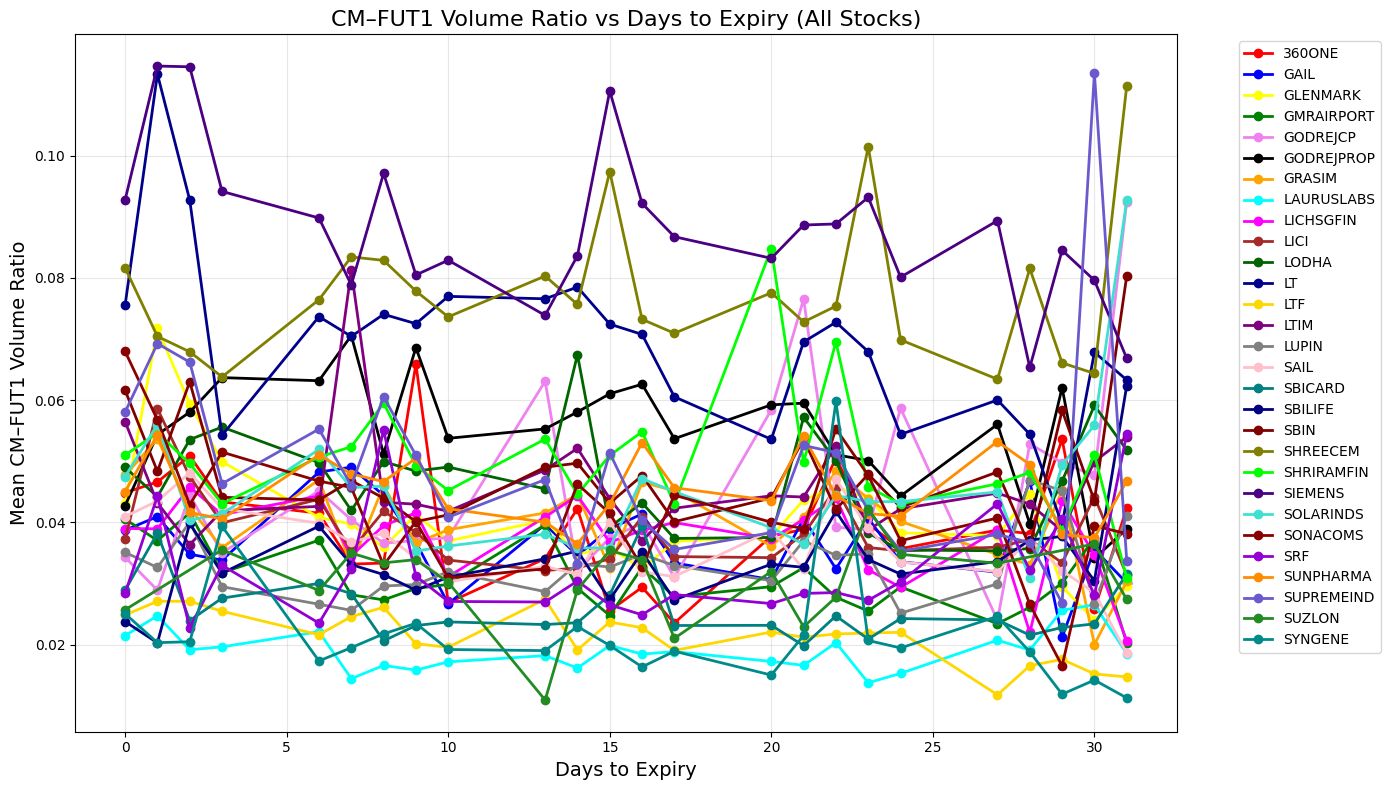

In [24]:
plt.figure(figsize=(14, 8))
stocks = list(stock_vol_cm_fut1.keys())

for i, stock in enumerate(stocks):
    df_plot = stock_vol_cm_fut1[stock]
    plt.plot(
        df_plot["days_to_expiry"],
        df_plot["mean_cm_fut1_ratio"],
        marker='o',
        linewidth=2,
        markersize=6,
        label=stock,
        color=custom_colors[i % len(custom_colors)]  # cycle through palette
    )

plt.xlabel("Days to Expiry", fontsize=14)
plt.ylabel("Mean CM–FUT1 Volume Ratio", fontsize=14)
plt.title("CM–FUT1 Volume Ratio vs Days to Expiry (All Stocks)", fontsize=16)

plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


1 b.2. Plot: fut1_fut2 volume ratio vs days_to_expiry


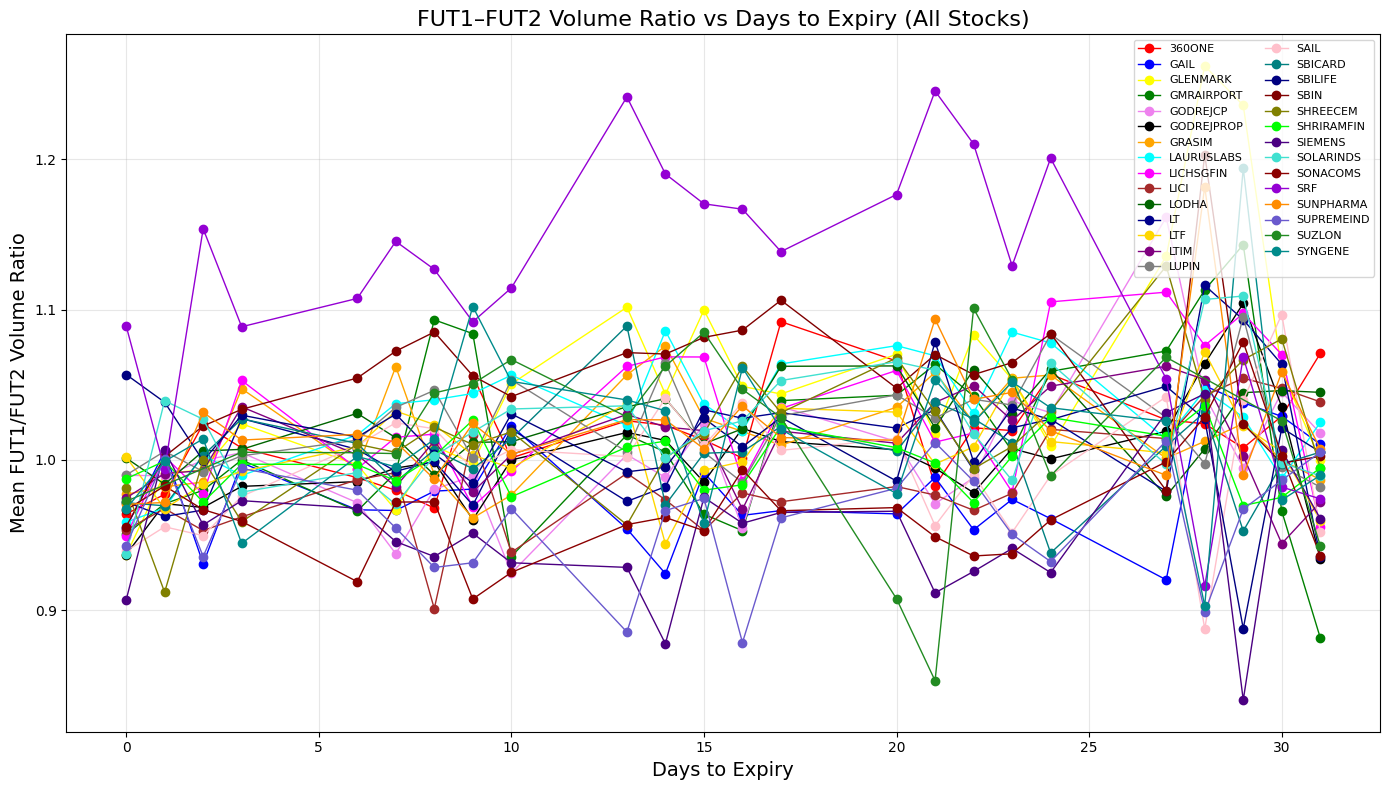

In [25]:
plt.figure(figsize=(14, 8))
stocks = list(stock_vol_fut1_fut2.keys())

for i, (stock, df_s) in enumerate(stock_vol_fut1_fut2.items()):
    if df_s.empty:
        continue
    plt.plot(
        df_s['days_to_expiry'],
        df_s['mean_fut1_fut2_ratio'],
        marker='o',
        linewidth=1,
        label=stock,
        color=custom_colors[i % len(custom_colors)]  # cycle through palette
    )

plt.xlabel('Days to Expiry', fontsize=14)
plt.ylabel('Mean FUT1/FUT2 Volume Ratio', fontsize=14)
plt.title('FUT1–FUT2 Volume Ratio vs Days to Expiry (All Stocks)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.tight_layout()
plt.show()
